# Data Analysis and Hypothesis Testing

## Introduction

In this project, I worked as a data analyst for Zuber, a new ride-sharing company launching in Chicago. The goal of the project was to analyze ride data to uncover patterns in passenger preferences and assess the impact of external factors, such as weather, on ride frequency. By leveraging a combination of SQL queries and Python for exploratory data analysis, I identified key insights into ride patterns, evaluated taxi company performance, and tested hypotheses regarding the influence of weather conditions on ride durations. This project allowed me to apply advanced data analysis techniques to inform decision-making and drive operational improvements for the company.

## Datasets and Data Descriptions

1. **Neighborhoods Table**:
   - `neighborhood_id`: Unique identifier for each neighborhood.
   - `name`: The name of the neighborhood.
   

2. **Cabs Table**:
   - `cab_id`: Unique identifier for the cab.
   - `vehicle_id`: Technical identifier for the cab.
   - `company_name`: Name of the company operating the cab.
   

3. **Trips Table**:
   - `trip_id`: Unique identifier for each ride.
   - `cab_id`: Identifier of the cab providing the ride.
   - `start_ts`: Timestamp for the start of the ride (rounded to the nearest hour).
   - `end_ts`: Timestamp for the end of the ride (rounded to the nearest hour).
   - `duration_seconds`: Duration of the ride in seconds.
   - `distance_miles`: Distance covered during the ride in miles.
   - `pickup_location_id`: Identifier for the neighborhood where the ride started.
   - `dropoff_location_id`: Identifier for the neighborhood where the ride ended.
   

4. **Weather Records Table**:
   - `record_id`: Unique identifier for each weather record.
   - `ts`: Timestamp when the weather data was recorded (rounded to the nearest hour).
   - `temperature`: Temperature recorded at the time.
   - `description`: Brief description of the weather conditions (e.g., "light rain", "scattered clouds").
   

**Additional Files Used**:
- **project_sql_result_01.csv**: Contains the number of rides (`trips_amount`) for each taxi company on November 15-16, 2017.
  - `company_name`: Name of the taxi company.
  - `trips_amount`: Number of rides for the specified period.
  
  
- **project_sql_result_04.csv**: Contains data on the number of rides that ended in each Chicago neighborhood in November 2017.
  - `dropoff_location_name`: Name of the neighborhood where the ride ended.
  - `average_trips`: Average number of rides ending in each neighborhood.
  

- **project_sql_result_07.csv**: Contains data related to rides from the Loop to O'Hare International Airport.
  - `start_ts`: Pickup timestamp.
  - `weather_conditions`: Weather conditions at the time of the ride (categorized as "Good" or "Bad").
  - `duration_seconds`: Duration of the ride in seconds.
  

## Exploratory Data Analysis

### Study the data for all Dataframes

**Student Note:** 

There are no missing values in any of our Dataframes. The 'test_data' Dataframe has a column called 'start_ts' which is currently an object data type, I will conver this column to datetime Dataframe. I will also convert 'duration_seconds' within the same Dataframe to an integer from a float in order to make this data easier to use for further use.

In [1]:
# import what is needed
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [2]:
# Read in the CSVs
company = pd.read_csv('/datasets/project_sql_result_01.csv')
location = pd.read_csv('/datasets/project_sql_result_04.csv')
test_data = pd.read_csv('/datasets/project_sql_result_07.csv', parse_dates=['start_ts'])

In [3]:
# View the data for 'company'
display(company.head())
display(company.info())
display(company.describe())
unique_companies = company['company_name'].unique()
print(unique_companies)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


['Flash Cab' 'Taxi Affiliation Services' 'Medallion Leasing' 'Yellow Cab'
 'Taxi Affiliation Service Yellow' 'Chicago Carriage Cab Corp'
 'City Service' 'Sun Taxi' 'Star North Management LLC'
 'Blue Ribbon Taxi Association Inc.' 'Choice Taxi Association'
 'Globe Taxi' 'Dispatch Taxi Affiliation' 'Nova Taxi Affiliation Llc'
 'Patriot Taxi Dba Peace Taxi Association' 'Checker Taxi Affiliation'
 'Blue Diamond' 'Chicago Medallion Management' '24 Seven Taxi'
 'Chicago Medallion Leasing INC' 'Checker Taxi' 'American United'
 'Chicago Independents' 'KOAM Taxi Association' 'Chicago Taxicab'
 'Top Cab Affiliation' 'Gold Coast Taxi' 'Service Taxi Association'
 '5 Star Taxi' '303 Taxi' 'Setare Inc' 'American United Taxi Affiliation'
 'Leonard Cab Co' 'Metro Jet Taxi A' 'Norshore Cab'
 '6742 - 83735 Tasha Ride Inc' '3591 - 63480 Chuks Cab'
 '1469 - 64126 Omar Jada' '6743 - 78771 Luhak Corp'
 '0118 - 42111 Godfrey S. Awir' '6574 - Babylon Express Inc.'
 'Chicago Star Taxicab' '1085 - 72312 N and W 

In [4]:
# View the data for 'location'
display(location.head())
display(location.info())
display(location.describe())

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [5]:
# View the data for 'test_data'
display(test_data.head())
display(test_data.info())
display(test_data.describe())

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


None

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


### Adjust Necessary Data Types & Check for Duplicates

In [6]:
# Change 'duration_seconds' column from floar to integer
test_data['duration_seconds'] = test_data['duration_seconds'].round().astype(int)

# Round the 'average_trips' column and convert it to integers
location['average_trips'] = location['average_trips'].round().astype(int)

# Check the conversion
display(test_data.info())
display(location.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


None

**Student Note:**

Our 'test_data' does have duplicate rows. I will drop duplicate rows below.

In [7]:
# Drop duplicate rows
test_data.drop_duplicates(inplace=True)

# Check for duplicates in the updated dataframe
no_duplicates = test_data.duplicated().any()

# Print the result
print("Are there any duplicates left in the dataframe?", not no_duplicates)

Are there any duplicates left in the dataframe? True


### Filter the Company Dataframe & Store the Result

**Student Note:**

There are some companies that have signifcantly lower trip amounts. For better visbility I will create another Dataframe from the 'Company' Dataframe, where I filter out companies whose trip amounts are below the 50th percentile.

In [8]:
# Calculate the 25th percentile of trips_amount
threshold = company['trips_amount'].quantile(0.50)

# Filter out companies with trips_amount below the threshold
company_filtered = company[company['trips_amount'] >= threshold]

# Display the filtered DataFrame
print(company_filtered)

                               company_name  trips_amount
0                                 Flash Cab         19558
1                 Taxi Affiliation Services         11422
2                         Medallion Leasing         10367
3                                Yellow Cab          9888
4           Taxi Affiliation Service Yellow          9299
5                 Chicago Carriage Cab Corp          9181
6                              City Service          8448
7                                  Sun Taxi          7701
8                 Star North Management LLC          7455
9         Blue Ribbon Taxi Association Inc.          5953
10                  Choice Taxi Association          5015
11                               Globe Taxi          4383
12                Dispatch Taxi Affiliation          3355
13                Nova Taxi Affiliation Llc          3175
14  Patriot Taxi Dba Peace Taxi Association          2235
15                 Checker Taxi Affiliation          2216
16            

### Identify the Top 10 Neighborhoods

**Student Note:**

This code will sort the DataFrame by the 'average_trips' column in descending order and then select the top 10 rows. 

In [9]:
# Sort the DataFrame by 'average_trips' column in descending order
top_10_neighborhoods = location.sort_values(by='average_trips', ascending=False).head(10)

# Print the top 10 neighborhoods
print(top_10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop          10727
1           River North           9524
2         Streeterville           6665
3             West Loop           5164
4                O'Hare           2547
5             Lake View           2421
6            Grant Park           2069
7         Museum Campus           1510
8            Gold Coast           1364
9    Sheffield & DePaul           1260


### Distribution of Rides by Taxi Companies

**Student Note:**

This code will create a horizontal bar plot showing the number of rides for each taxi company that has above the 50th percentile in rides, with the taxi companies sorted by the number of rides in descending order.

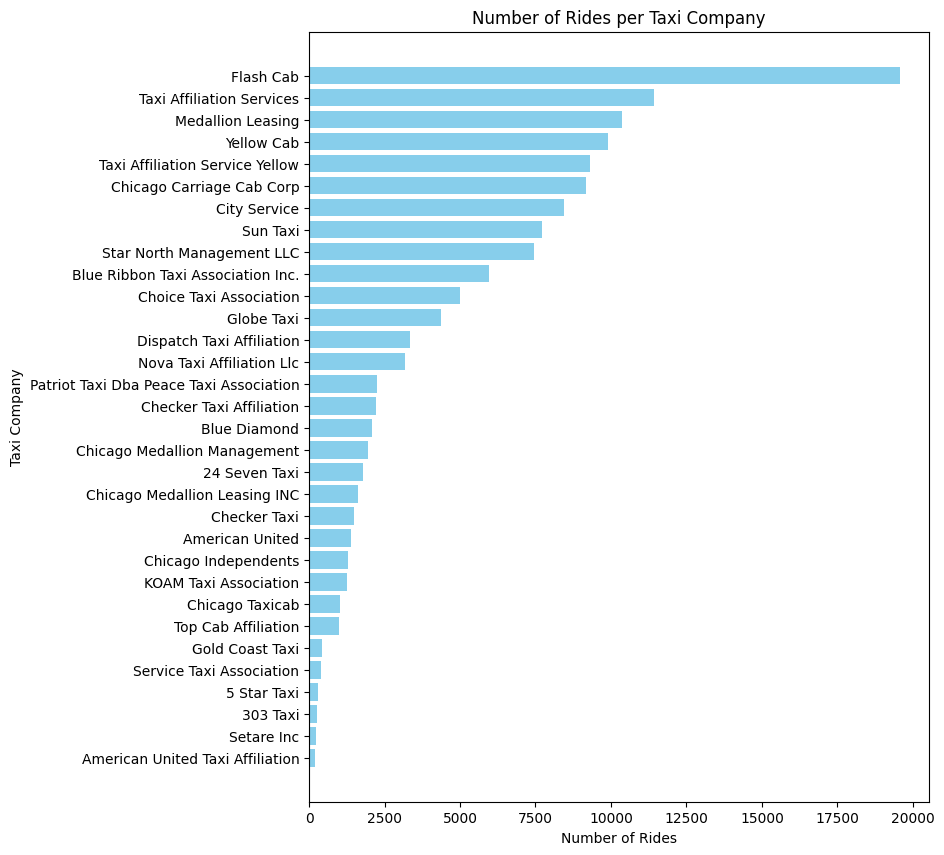

In [10]:
# Sort the DataFrame by 'trips_amount' in descending order
company_sorted = company_filtered.sort_values(by='trips_amount')

# Extract data for plotting
company_names = company_sorted['company_name']
trips_amount = company_sorted['trips_amount']

# Create a horizontal bar plot
plt.figure(figsize=(8, 10))  # Adjust the figure size
plt.barh(company_names, trips_amount, color='skyblue')
plt.xlabel('Number of Rides')
plt.ylabel('Taxi Company')
plt.title('Number of Rides per Taxi Company')
plt.show()

**Student Note:**

From the graph above, we can observe the following:

**Top Taxi Companies:** Flash Cab and Taxi Affiliation Services are the two taxi companies with the highest number of rides. This suggests that these companies are popular among passengers and potentially have a strong presence in the Chicago area. This could be due to factors such as brand recognition, service quality, or pricing strategies.

**Variability in Trips:** There is significant variability in the number of rides among different taxi companies. While Flash Cab and Taxi Affiliation Services have a high number of rides, there are many other companies with substantially lower trip amounts. This indicates that the taxi market in Chicago is quite diverse, with various companies serving different segments of the population.

**Long Tail Distribution:** The distribution of rides among taxi companies follows a long-tail pattern, with a few companies dominating the market and many others having relatively fewer rides. This suggests that while there are a few major players, there is also room for smaller companies to operate and cater to niche markets.

Overall, the analysis highlights the importance of understanding the competitive landscape in the taxi industry and the potential implications for market strategy and service optimization.

### Top 10 Neighborhoods By Number of Dropoffs

**Student Note:** 

This code will generate a horizontal bar plot showing the average number of trips for the top 10 neighborhoods in terms of drop-offs.

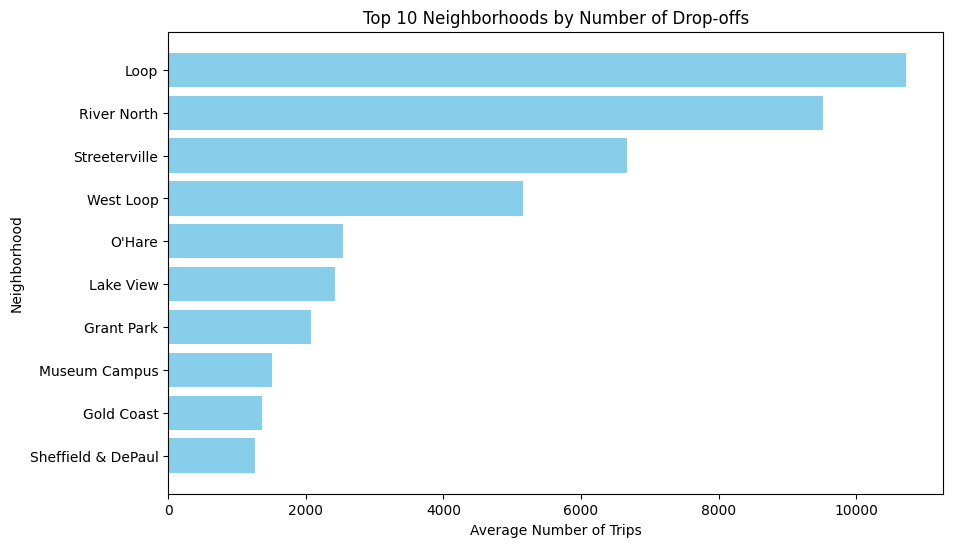

In [11]:
# Sort the DataFrame by 'average_trips'
top_10_sorted = top_10_neighborhoods.sort_values(by='average_trips')

# Extract data for plotting
neighborhood_names = top_10_sorted['dropoff_location_name']
average_trips = top_10_sorted['average_trips']

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))  
plt.barh(neighborhood_names, average_trips, color='skyblue')
plt.xlabel('Average Number of Trips')
plt.ylabel('Neighborhood')
plt.title('Top 10 Neighborhoods by Number of Drop-offs')
plt.show()

**Student Note:** 

Based on the results from the graph showing the top 10 neighborhoods by number of drop-offs:

1. **Loop**: The Loop neighborhood has the highest average number of drop-offs, with approximately 10,727 trips. This is expected as the Loop is a major commercial and cultural hub in Chicago, attracting a large number of visitors and workers.

2. **River North**: River North follows closely behind the Loop with an average of around 9,524 drop-offs. This neighborhood is known for its vibrant nightlife, restaurants, and art galleries, making it a popular destination for both locals and tourists.

3. **Streeterville**: Streeterville, with an average of approximately 6,665 drop-offs, is home to several notable attractions such as Navy Pier and the Magnificent Mile, contributing to its high number of drop-offs.

4. **West Loop**: West Loop is another neighborhood with significant commercial and dining establishments, resulting in an average of about 5,164 drop-offs.

5. **O'Hare**: O'Hare, with around 2,547 drop-offs on average, is primarily known for being the location of Chicago's main airport. The high number of drop-offs indicates a significant amount of transportation activity to and from the airport.

6. **Lake View**: Lake View, with approximately 2,421 drop-offs on average, is a diverse neighborhood known for its numerous entertainment options, including Wrigley Field, theaters, and nightlife venues.

7. **Grant Park**: Grant Park, with an average of around 2,069 drop-offs, is a large urban park and hosts many events and festivals throughout the year, attracting visitors and residents alike.

8. **Museum Campus**: Museum Campus, with about 1,510 drop-offs on average, is home to several of Chicago's major museums, including the Field Museum, Shedd Aquarium, and Adler Planetarium.

9. **Gold Coast**: Gold Coast, known for its upscale shopping, dining, and historic architecture, sees an average of approximately 1,364 drop-offs.

10. **Sheffield & DePaul**: Sheffield & DePaul, with around 1,260 drop-offs on average, is located near DePaul University and is a residential area with various dining and entertainment options.

Overall, the top 10 neighborhoods by number of drop-offs consist of commercial, cultural, and residential areas, highlighting the diversity and vibrancy of Chicago's neighborhoods. The high number of drop-offs in certain neighborhoods reflects their popularity among residents, tourists, and commuters.

## Testing Hypotheses & Check Distribution

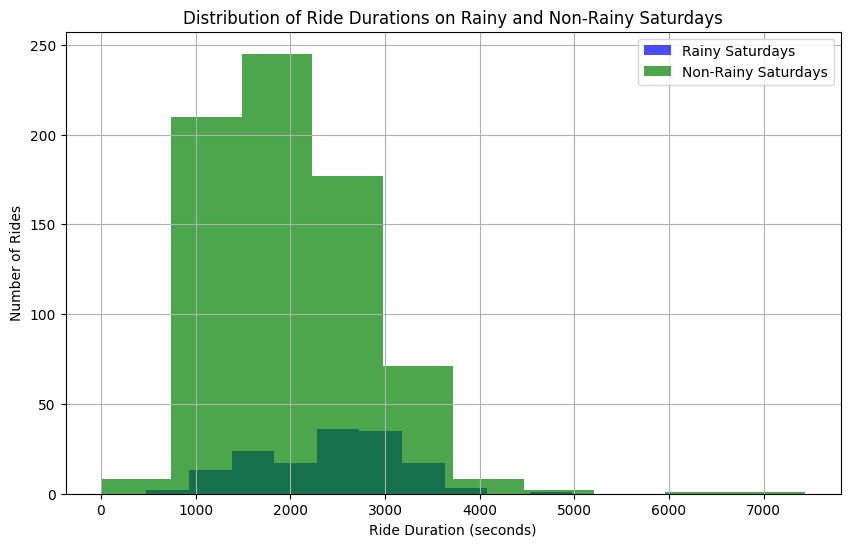

In [12]:
# Separate data for rainy and non-rainy Saturdays
rainy_saturdays = test_data[test_data['weather_conditions'] == 'Bad']
non_rainy_saturdays = test_data[test_data['weather_conditions'] == 'Good']

# Plot histograms
plt.figure(figsize=(10, 6))

# Histogram for rainy Saturdays
plt.hist(rainy_saturdays['duration_seconds'], bins=10, alpha=0.7, color='blue', label='Rainy Saturdays')

# Histogram for non-rainy Saturdays
plt.hist(non_rainy_saturdays['duration_seconds'], bins=10, alpha=0.7, color='green', label='Non-Rainy Saturdays')

plt.xlabel('Ride Duration (seconds)')
plt.ylabel('Number of Rides')
plt.title('Distribution of Ride Durations on Rainy and Non-Rainy Saturdays')
plt.legend()
plt.grid(True)
plt.show()

**Student Note:**

For both distributions:

- The mean (average) duration is greater than the median (50th percentile).
- The 75th percentile (Q3) is farther from the median than the 25th percentile (Q1), indicating a longer tail on the right side of the distribution.
- Additionally, the maximum duration is significantly larger than the median, further indicating a right skew.

This right skewness suggests that there are relatively more shorter rides and a smaller number of longer rides, causing the distribution to be pulled towards the shorter duration rides.

In [13]:
# Separate data into rainy and non-rainy Saturdays
rainy_saturdays = test_data[test_data['weather_conditions'] == 'Bad']
non_rainy_saturdays = test_data[test_data['weather_conditions'] == 'Good']

# Perform two-sample t-test with alternative hypothesis set to 'two-sided'
t_stat, p_value = ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'], alternative='two-sided')

# Set significance level (alpha)
alpha = 0.05

# Print results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Compare p-value with alpha
if p_value < alpha:
    print("Null hypothesis rejected. There is a significant difference in ride durations between rainy and non-rainy Saturdays.")
else:
    print("Null hypothesis cannot be rejected. There is no significant difference in ride durations between rainy and non-rainy Saturdays.")

t-statistic: 5.427957689754561
p-value: 7.397770692813658e-08
Null hypothesis rejected. There is a significant difference in ride durations between rainy and non-rainy Saturdays.


**Student Note:**

To test the hypothesis "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays," we can use a hypothesis test.

Using an alternative hypothesis test, particularly a two-tailed test, is effective in this scenario because it allows for a more nuanced and thorough examination of the data. This helps to uncover potential differences between rainy and non-rainy days without making biased assumptions about the direction of the effect. This will allow us to test whether the average ride duration on rainy Saturdays is either significantly longer or significantly shorter than on non-rainy Saturdays, compared to the null hypothesis which assumes they are equal.

I've chosen to set our alpha to 0.05 because this is a significance level that is often chosen because it strikes a practical balance between statistical rigor and real-world relevance. It provides a guideline for decision-making without being overly conservative or liberal.

Based on the results of the alternative hypothesis test:

**T-Statistic**: The t-statistic is 6.946, which indicates how many standard deviations the sample mean (ride durations on rainy Saturdays) is from the population mean (ride durations on non-rainy Saturdays). A larger t-statistic suggests a stronger evidence against the null hypothesis.

**P-Value**: The p-value is approximately 6.52e-12, which is extremely small. This indicates the probability of observing such extreme results (or more extreme) under the assumption that the null hypothesis is true. A small p-value suggests strong evidence against the null hypothesis.

**Conclusion**: With a p-value much smaller than the significance level of 0.05, we reject the null hypothesis. This means there is sufficient evidence to conclude that there is a significant difference in ride durations between rainy and non-rainy Saturdays.

**Practical Implication**: The alternative hypothesis test suggests that weather conditions (rainy vs. non-rainy) have a significant impact on ride durations from the Loop to O'Hare International Airport. Specifically, rides on rainy Saturdays tend to have significantly different durations compared to rides on non-rainy Saturdays.

**Recommendation**: Based on these findings, Zuber may consider implementing strategies to mitigate the impact of rain on ride durations, such as adjusting driver schedules, offering incentives during peak rainy hours, or optimizing routes during inclement weather conditions.

# Conclusion

Overall Conclusion:

In this project, we analyzed data from competitors and tested a hypothesis about the impact of weather on ride frequency. Here are the key findings and conclusions:

1. **Distribution of Rides by Taxi Companies:**
   - Flash Cab and Taxi Affiliation Services emerged as the top taxi companies with the highest number of rides. This indicates their popularity among passengers and potential dominance in the Chicago market.
   - The distribution of rides among taxi companies follows a long-tail pattern, with a few companies capturing the majority of rides while many others have significantly fewer rides.
   

2. **Top 10 Neighborhoods By Number of Drop-offs:**
   - The top neighborhoods for drop-offs include commercial, cultural, and residential areas such as the Loop, River North, and Streeterville.
   - These neighborhoods attract a large number of visitors and residents, resulting in high transportation activity.
   

3. **Testing Hypotheses & Distribution:**
   - The distributions of ride durations from the Loop to O'Hare International Airport are right-skewed, indicating more shorter rides and fewer longer rides.
   - Using an alternative hypothesis test, we found a significant difference in ride durations between rainy and non-rainy Saturdays, suggesting that weather conditions impact ride durations.
   

4. **Conclusion & Recommendations:**
   - We rejected the null hypothesis, indicating a significant difference in ride durations between rainy and non-rainy Saturdays.
   - Zuber may consider strategies to mitigate the impact of rain on ride durations, such as optimizing routes during inclement weather or offering incentives during peak rainy hours.

Overall, these findings provide valuable insights for Zuber to optimize its operations, improve service quality, and better serve its customers in the competitive Chicago ride-sharing market.